In [18]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import explained_variance_score
from sklearn.metrics import confusion_matrix

import os
print(os.listdir("../input"))
import warnings  
warnings.filterwarnings('ignore')

# Any results you write to the current directory are saved as output.

['kc_house_data.csv']


***Load the Data***

Let's import the 'kc_house_data.csv' file . I will name the variable as dataset.


In [19]:
dataset = pd.read_csv("../input/kc_house_data.csv")

> ***First 5 rows of data.***

Since we have loaded the data, now we will read our data. The below will give us the 5 record of our dataset.

In [20]:
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


***Dataset contains:*****


**Id:** a notation for a house

**Date:** Date house was sold

**Price:** Price is prediction target

**Bedrooms:** Number of Bedrooms/House

**Bathrooms:** Number of bathrooms/House

**Sqft_Living:**  square footage of the home

***Sqft_Lot:*** square footage of the lot

***Floors:*** Total floors (levels) in house

***Waterfront:*** House which has a view to a waterfront

***View:*** Has been viewed

***Condition:*** How good the condition is ( Overall )

***Grade:*** overall grade given to the housing unit, based on King County grading system

***Sqft_Above:*** square footage of house apart from basement

***Sqft_Basement:*** square footage of the basement

***Yr_Built:*** Built Year

***Yr_Renovated:*** Year when house was renovated

***Zipcode:*** Zip

***Lat:*** Latitude coordinate

***Long:*** Longitude coordinate

***Sqft_Living15:*** Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area

***Sqft_Lot15:***  lotSize area in 2015(implies-- some renovations)


***Null Value Detection***
Let's Check for null values in the dataset


In [21]:
#Check whether there is any null values
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


***Finding Unique Values:***

From the above it is clear that the dataset have no null values present, so lets check how many unique values is present for each feature. We will loop through the dataset for checking the unique values present.

In [22]:
#Lets find out how many unique values are present in each column

for value in dataset:
    print('For {},{} unique values present'.format(value,dataset[value].nunique()))

For id,21436 unique values present
For date,372 unique values present
For price,4028 unique values present
For bedrooms,13 unique values present
For bathrooms,30 unique values present
For sqft_living,1038 unique values present
For sqft_lot,9782 unique values present
For floors,6 unique values present
For waterfront,2 unique values present
For view,5 unique values present
For condition,5 unique values present
For grade,12 unique values present
For sqft_above,946 unique values present
For sqft_basement,306 unique values present
For yr_built,116 unique values present
For yr_renovated,70 unique values present
For zipcode,70 unique values present
For lat,5034 unique values present
For long,752 unique values present
For sqft_living15,777 unique values present
For sqft_lot15,8689 unique values present


***Dropping of the particular column value:***

We don't require the column id and date at this point so we will be dropping them from the dataset.  

In [23]:
dataset = dataset.drop(['id','date'],axis=1)

***View the modified dataset***

Let's now again view the dataset using the same head command we used earlier. 

In [24]:
dataset.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


***Data Visulaization using seaborn***

So all the column data remains the same except the two column is dropped. Let's now forward with data visualization using a pairplot


<Figure size 720x432 with 0 Axes>

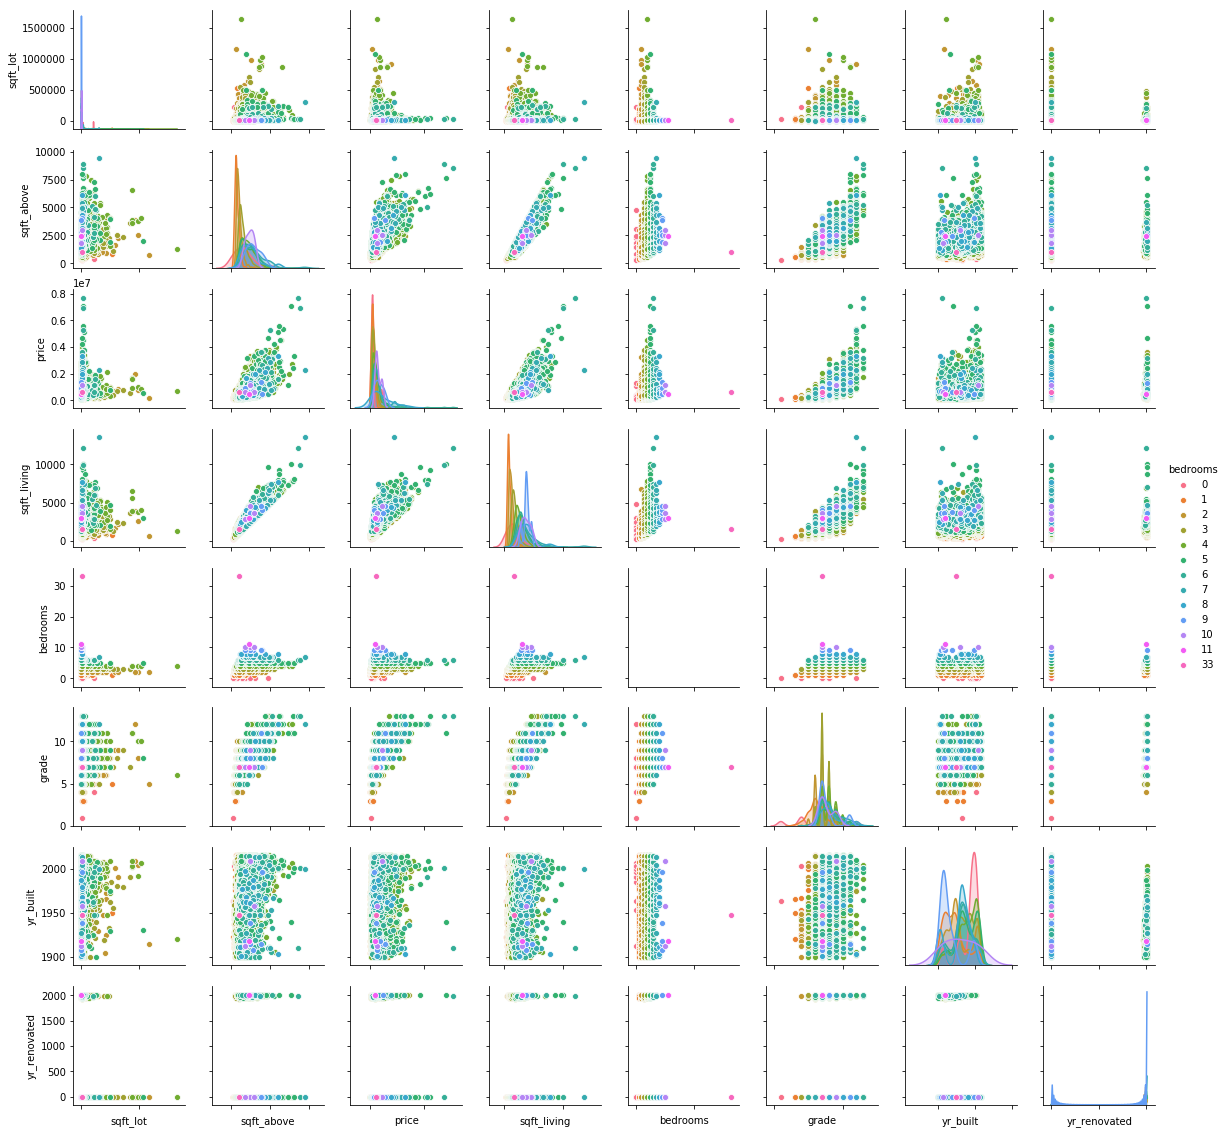

In [25]:
plt.figure(figsize=(10,6))
sns.plotting_context('notebook',font_scale=1.2)
g = sns.pairplot(dataset[['sqft_lot','sqft_above','price','sqft_living','bedrooms','grade','yr_built','yr_renovated']]
                 ,hue='bedrooms',size=2)
g.set(xticklabels=[])

From the above plot it is clear for a linear regression for sqft_living & price, 

So lets plot them in a joint plot to explore more on the data. 

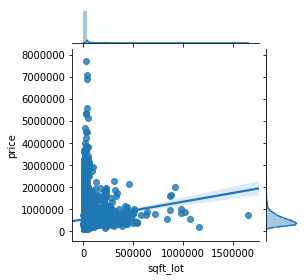

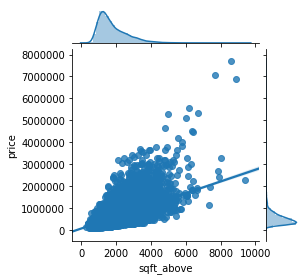

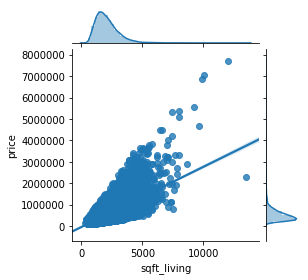

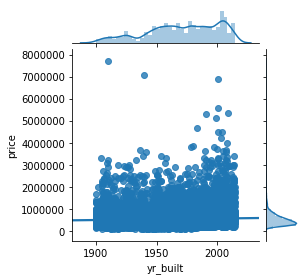

In [26]:

sns.jointplot(x='sqft_lot',y='price',data=dataset,kind='reg',size=4)
sns.jointplot(x='sqft_above',y='price',data=dataset,kind='reg',size=4)
sns.jointplot(x='sqft_living',y='price',data=dataset,kind='reg',size=4)
sns.jointplot(x='yr_built',y='price',data=dataset,kind='reg',size=4)


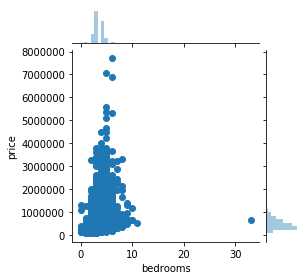

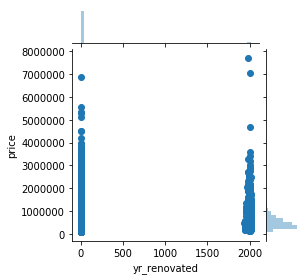

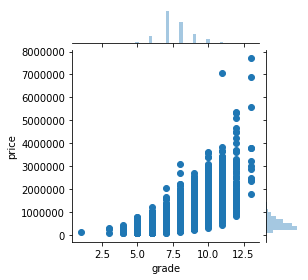

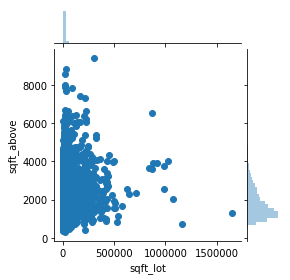

In [27]:
sns.jointplot(x='bedrooms',y='price',data=dataset,kind='scatter',size=4)
sns.jointplot(x='yr_renovated',y='price',data=dataset,kind='scatter',size=4)
sns.jointplot(x='grade',y='price',data=dataset,kind='scatter',size=4)
sns.jointplot(x='sqft_lot',y='sqft_above',data=dataset,kind='scatter',size=4)

***Co relation between Variables***

We wil use heatmap to view the co relation between variables



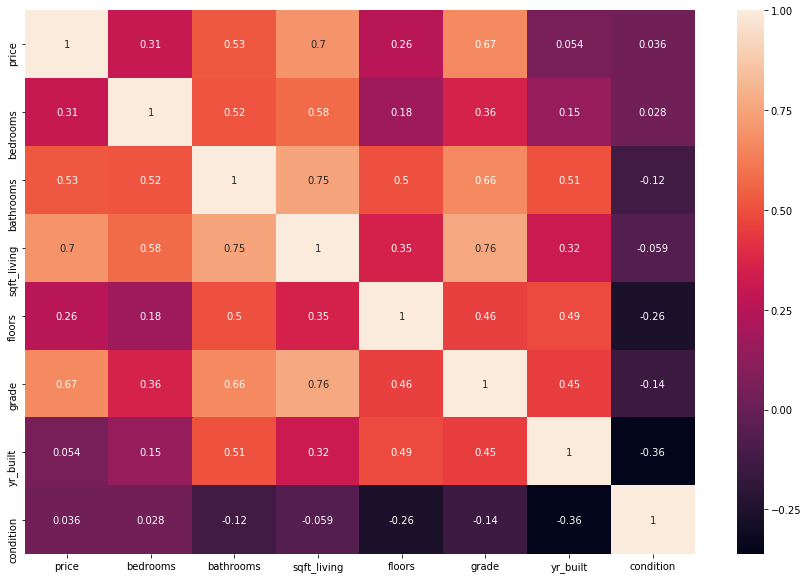

In [28]:
plt.figure(figsize=(15,10))
columns =['price','bedrooms','bathrooms','sqft_living','floors','grade','yr_built','condition']
sns.heatmap(dataset[columns].corr(),annot=True)

***Model on the train data***

We will start building our model using different regression models



In [29]:
# X(Independent variables) and y(target variables) 
X = dataset.iloc[:,1:].values
y = dataset.iloc[:,0].values

In [30]:
#Splitting the data into train,test data 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

*** Multiple Linear Regression: ***

Fitting the train set to multiple linear regression and getting the score of the model

In [31]:
mlr = LinearRegression()
mlr.fit(X_train,y_train)
mlr_score = mlr.score(X_test,y_test)
pred_mlr = mlr.predict(X_test)
expl_mlr = explained_variance_score(pred_mlr,y_test)



***Decision Tree ***

In [32]:
tr_regressor = DecisionTreeRegressor(random_state=0)
tr_regressor.fit(X_train,y_train)
tr_regressor.score(X_test,y_test)
pred_tr = tr_regressor.predict(X_test)
decision_score=tr_regressor.score(X_test,y_test)
expl_tr = explained_variance_score(pred_tr,y_test)


***Random Forest Regression Model***

In [33]:

rf_regressor = RandomForestRegressor(n_estimators=28,random_state=0)
rf_regressor.fit(X_train,y_train)
rf_regressor.score(X_test,y_test)
rf_pred =rf_regressor.predict(X_test)
rf_score=rf_regressor.score(X_test,y_test)
expl_rf = explained_variance_score(rf_pred,y_test)



*** Calculate Model Score ***

Let's calculate the model score to understand how our model performed along with the explained variance score.

In [34]:
print("Multiple Linear Regression Model Score is ",round(mlr.score(X_test,y_test)*100))
print("Decision tree  Regression Model Score is ",round(tr_regressor.score(X_test,y_test)*100))
print("Random Forest Regression Model Score is ",round(rf_regressor.score(X_test,y_test)*100))

#Let's have a tabular pandas data frame, for a clear comparison

models_score =pd.DataFrame({'Model':['Multiple Linear Regression','Decision Tree','Random forest Regression'],
                            'Score':[mlr_score,decision_score,rf_score],
                            'Explained Variance Score':[expl_mlr,expl_tr,expl_rf]
                           })
models_score.sort_values(by='Score',ascending=False)

Multiple Linear Regression Model Score is  69.0
Decision tree  Regression Model Score is  75.0
Random Forest Regression Model Score is  88.0


,Model,Score,Explained Variance Score
2,Random forest Regression,0.88011,0.846248
1,Decision Tree,0.74962,0.730713
0,Multiple Linear Regression,0.68779,0.527528


### Conclusion

From the above it is clear that random forest accuracy is **88%** and also expalined variance score is **0.84**  . So Random Forest is a suitable model for predicting the price of the house. 

Though there remains other regression model which can bring out the best of the dataset.

Please upvote if you like my work, this motivates  me to work better :)


